## Lois normales tronquées


Soit le vecteur aléatoire $X = (X_1,\dots,X_d) \sim \mathcal{N}_d(\mu,\Sigma)$, de densité noté $g(x) = f_{\mathcal{N}_d(\mu,\Sigma)} = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}$ et de fonction de répartition noté $G$, définies sur $\mathbb{R}$. 
$\mu \in \mathbb{R}^d$ et $\Sigma \in \mathcal{S}_d^+(\mathbb{R})$ (matrice carrée réelle de taille $d$, symétrique et semi-définie positive).

$X > 0$ signifie que l'inégalité est effectuée composante par composante : $X_1 > 0 \: et \: \dots \: et \: X_d > 0$. Pour $x \in ]0,+\infty[^d$, $X \leq x$ signifie : $X_1 \leq x_1 \: et \: \dots \: et \: X_d \leq x_d $.

La loi normale de paramètre $\mu, \Sigma$ tronquée à $]0,+\infty[$, notée $\mathcal{N}_{>0,d}(\mu,\Sigma)$, est la loi du vecteur aléatoire $X|X>0 = (X_1|X_1>0,\dots,X_d|X_d>0)$, de support $]0,+\infty[^d$. On note sa densité $f = f_{\mathcal{N}_{>0,d}(\mu,\Sigma)}$ et sa fonction de répartition $F$.

In [1]:
import numpy as np
#import numpy.random as npr
import scipy.stats as st
import matplotlib.pyplot as plt
import time

---

### Question 1 : densité de la loi

Soit $f$ la densité de $X|X>0$ et soit $F$ sa fonction de répartition.

 $\forall x \in ]0,+\infty[^d$,

$$
F(x)
= \mathbb{P}(X \leq x | X > 0) 
= \frac{\mathbb{P}(X \leq x , X > 0)}{\mathbb{P}(X > 0)} 
= \frac{G(x) - G(0)}{1 - G(0)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{1 - G(0)}
= \frac{g(x)}{1 - G(0)}
= Z(\mu,\Sigma) g(x) 
$$

avec $$ Z(\mu,\Sigma) = (1 - G(0))^{-1} =  \left( \int_{]0,+\infty[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)} dx  \right)^{-1} $$
correspondant à l'inverse d'une intégrale difficile à calculer.

Donc la densité $f$ de la loi $\mathcal{N}_{>0,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]0,+\infty[^d} g(x) dx} \mathbb{1}_{]0,+\infty[^d}(x)
$$

Généralisation de la troncature :




- $a \in \mathbb{R}^d$ , soient $f$ et $F$ la densité et la fonction de répartition de $X|X>a$

$\forall x \in ]a,+\infty[^d$,
 
$$
F(x)
= \mathbb{P}(X \leq x | X > a) 
= \frac{\mathbb{P}(X \leq x , X > a)}{\mathbb{P}(X > a)} 
= \frac{G(x) - G(a)}{1 - G(a)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{1 - G(a)}
= \frac{g(x)}{1 - G(a)}
= Z(\mu,\Sigma,a) g(x) 
$$

avec $$ Z(\mu,\Sigma,a) = (1 - G(a))^{-1} =  \left( \int_{]a,+\infty[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}  \right)^{-1} $$

Donc la densité $f$ de la loi $\mathcal{N}_{>a,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]a,+\infty[^d} g(x) dx} \mathbb{1}_{]a,+\infty[^d}(x)
$$




- $b \in \mathbb{R}^d$ , soit $f$ et $F$ la densité et la fonction de répartition de $X|X<b$

 $\forall x \in ]-\infty,b[^d$,
 
$$
F(x)
= \mathbb{P}(X \leq x | X < b) 
= \frac{\mathbb{P}(X \leq x, X < b)}{\mathbb{P}(X < b)} 
= \frac{\mathbb{P}(X \leq x)}{\mathbb{P}(X < b)} 
= \frac{G(x)}{G(b)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{G(b)}
= \frac{g(x)}{G(b)}
= Z(\mu,\Sigma,b) g(x) 
$$

avec $$ Z(\mu,\Sigma,b) = G(b)^{-1} =  \left( \int_{]-\infty,b[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}  \right)^{-1} $$ 

Donc la densité $f$ de la loi $\mathcal{N}_{<b,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]-\infty,b[^d} g(x) dx} \mathbb{1}_{]-\infty,b[^d}(x)
$$



- $a,b \in \mathbb{R}^d$ , soit $f$ et $F$ la densité et la fonction de répartition de $X|a<X<b$

$\forall x \in ]a,b[^d$,

$$
F(x)
= \mathbb{P}(X \leq x | a < X < b) 
= \frac{\mathbb{P}(X \leq x, a < X < b)}{\mathbb{P}(a < X < b)} 
= \frac{\mathbb{P}(a < X \leq x)}{\mathbb{P}(a < X < b)} 
= \frac{G(x) - G(a)}{G(b) - G(a)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{G(b) - G(a)}
= \frac{g(x)}{G(b) - G(a)}
= Z(\mu,\Sigma,a,b) g(x) 
$$

avec $$ Z(\mu,\Sigma,a,b) = (G(b) - G(a))^{-1} =  \left( \int_{]a,b[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}  \right)^{-1} $$ 

Donc la densité $f$ de la loi $\mathcal{N}_{>a,<b,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]a,b[^d} g(x) dx} \mathbb{1}_{]a,b[^d}(x)
$$


---

### Question 2 : simulations par Acceptation-Rejet

On suppose $d=1$. On veut simuler par Acceptation-Rejet la loi $\mathcal{N}_{>0}(\mu,\sigma^2)$ de densité $f$.

- loi de proposition : $\mathcal{N}(\mu,\sigma^2)$ de densité $g$

Comme $ \frac{f(x)}{g(x)} = (1-F(0))^{-1} \mathbb{1}_{]0,+\infty[}(x) \leq (1-F(0))^{-1} =  (\mathbb{P}_X(X > 0))^{-1} = (\mathbb{P}_W(\mu + \sigma W > 0))^{-1} = (\mathbb{P}_W(W \leq \frac{\mu}{\sigma}))^{-1} = (\Phi(\frac{\mu}{\sigma}))^{-1} = M $

où $ W \sim \mathcal{N}(0,1)$ de fonction de répartition $\Phi$.


Ainsi on simule $f$ de la façon suivante :

1) on simule $Y \sim g$ ;

2) on simule $U \sim \mathcal{U}(]0,1[)$ ;

3) si $U \leq \frac{f(Y)}{Mg(Y)} = \mathbb{1}_{]0,+\infty[}(Y) $, alors $X \overset{loi}{=} Y \sim f$ ; sinon retour en 1)

In [2]:
#version naïve de l'AR de loi proposition g
def AR_g_V1(n,m,s):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi de proposition g (et de la loi cible f)
    #s = paramètre écart-type de la loi de proposition g (et de la loi cible f)
    
    resultat = []
    g = st.norm(loc=m,scale=s)
    while len(resultat) < n:
        Y = g.rvs(size=1)
        U = st.uniform.rvs(size=1)
        
        if (Y > 0):
            resultat.append(Y)
            
    return np.r_[tuple(resultat)]

        
#version améliorée  de l'AR de loi proposition g
def AR_g_V2(n,m,s):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi de proposition g (et de la loi cible f)
    #s = paramètre écart-type de la loi de proposition g (et de la loi cible f)
    
    resultat = []
    lresultat = 0
    proba_accepte = st.norm.cdf(m/s,loc=0,scale=1) #=1/M
    g = st.norm(loc=m,scale=s)
    while lresultat < n:
        missing = n - lresultat
        n_simu = int(missing / proba_accepte)
        Y = g.rvs(size=n_simu)
        U = st.uniform.rvs(size=n_simu)
        
        accepte = Y > 0
        if sum(accepte) > 0:
            resultat.append(Y[accepte])
        lresultat += sum(accepte)
        
    return np.r_[tuple(resultat)][0:(n-1)]
        
        

On remarque que pour $\mu > 0$, la probabilité d'acceptation vérifie $\frac{1}{M} = \Phi(\frac{\mu}{\sigma}) > 0.5$. La probabilité d'acceptation $\frac{1}{M}$ est d'autant plus grande lorsque $\mu >> 0$. Cette loi de proposition est donc intéressante pour $\mu >0$.

In [3]:
n = 100_000 #nombre de valeurs à simuler


proba d'acceptation pour (mu=1, sigma=2) = 0.6914624612740131 
proba d'acceptation pour (mu=-1, sigma=2) = 0.3085375387259869 


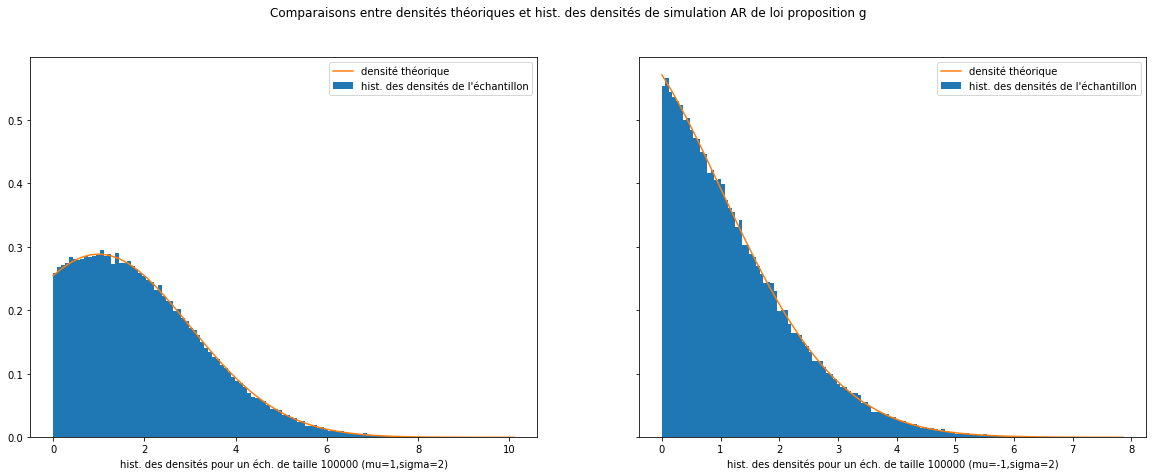

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True, figsize=(20,7))
fig.suptitle('Comparaisons entre densités théoriques et hist. des densités de simulation AR de loi proposition g ')

m = 1 #mu
s = 2 #sigma

print("proba d'acceptation pour (mu={0}, sigma={1}) = {2} ".format(m,s,st.norm.cdf(m/s,loc=0,scale=1)) )
echantillon = AR_g_V2(n,m,s)

ax1.hist(echantillon, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax1.plot(np.linspace(0,max(echantillon),50), st.norm.pdf(np.linspace(0,max(echantillon),50),loc=m,scale=s)/(1-st.norm.cdf(0,loc=m,scale=s)), label = "densité théorique")
ax1.set(xlabel="hist. des densités pour un éch. de taille {0} (mu={1},sigma={2})".format(n,m,s))
ax1.legend()

m = -1
s = 2 

print("proba d'acceptation pour (mu={0}, sigma={1}) = {2} ".format(m,s,st.norm.cdf(m/s,loc=0,scale=1)) )
echantillon = AR_g_V2(n,m,s)

ax2.hist(echantillon, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax2.plot(np.linspace(0,max(echantillon),100), st.norm.pdf(np.linspace(0,max(echantillon),100),loc=m,scale=s)/(1-st.norm.cdf(0,loc=m,scale=s)), label = "densité théorique")
ax2.set(xlabel="hist. des densités pour un éch. de taille {0} (mu={1},sigma={2})".format(n,m,s))
ax2.legend()

plt.show()


Comparons <code>AR_g_V1</code> et <code>AR_g_V2</code> en terme de temps de calcul, pour des paramètres fixés :

In [5]:
m = 4
s = 2
print("mu = {0}, sigma = {1}".format(m,s))

start = time.time()
AR_g_V1(10_000, m, s)
end = time.time()
print("temps pour AR_g_V1 : {0}  -  proba acceptation = {1}".format(end-start,st.norm.cdf(m/s,loc=0,scale=1)))

start = time.time()
AR_g_V2(10_000, m, s)
end = time.time()
print("temps pour AR_g_V2 : {0}  -  proba acceptation = idem".format(end-start))


mu = 4, sigma = 2
temps pour AR_g_V1 : 1.1355071067810059  -  proba acceptation = 0.9772498680518208
temps pour AR_g_V2 : 0.05455446243286133  -  proba acceptation = idem


On préférera <code>AR_g_V2</code>.

- loi de proposition : $\mathcal{E}(\lambda)$, $\lambda > 0$, de densité $h(x) = \lambda e^{- \lambda x} \mathbb{1}_{]0,+\infty[}(x) $ 

$$\forall x>0, \;\; \frac{f(x)}{h(x)} 
= \frac{g(x)}{\Phi(\frac{\mu}{\sigma})h(x)} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma} \frac{e^{-\frac{1}{2\sigma^2}(x-\mu)^2}}{\lambda e^{-\lambda x}} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2}(x-\mu)^2 + \lambda x} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2} ((x-\mu)^2 + 2 \sigma^2 \lambda x) } $$

Soit 
\begin{align*}
P(x) & = (x-\mu)^2 + 2 \sigma^2 \lambda x  \\
& = x^2 - 2 \mu x + \mu^2 + 2 \sigma^2 \lambda x \\
& = x^2 - 2 x (\mu + \sigma^2 \lambda) + \mu^2 \\
& = x^2 - 2 x (\mu + \sigma^2 \lambda) + (\mu + \sigma^2 \lambda)^2 + \mu^2 - (\mu + \sigma^2 \lambda)^2 \\
& = ( x - (\mu + \sigma^2 \lambda) )^2 + \mu^2 - \mu^2 - 2 \mu \sigma^2 \lambda - \sigma^4 \lambda^2 \\
& = ( x - (\mu + \sigma^2 \lambda) )^2 - 2 \sigma^2 (\mu \lambda + \frac{\lambda^2 \sigma^2}{2})
\end{align*}

D'où 
$$\forall x>0, \;\; \frac{f(x)}{h(x)} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2} P(x) }
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}}
$$

On cherche à majorer ce quotient en $x>0$.
$x \mapsto \frac{f(x)}{h(x)}$ est maximum lorsque $x \mapsto e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2}$ atteint son maximum, c'est-à-dire lorsque $x \mapsto ( x - (\mu + \sigma^2 \lambda) )^2$ atteint son minimum : il est atteint en $x = \mu + \lambda \sigma^2$ si $\mu + \lambda \sigma^2 > 0$, sinon il est atteint en $x = 0$.

En d'autres termes : 

pour $\mu + \lambda \sigma^2 > 0$, $\underset{x > 0}{\text{argmax}}\: \frac{f(x)}{h(x)} = \underset{x > 0}{\text{argmax}}\: e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2} = \underset{x > 0}{\text{argmin}}\: ( x - (\mu + \sigma^2 \lambda) )^2 = \mu + \lambda \sigma^2$ ;

pour $\mu + \lambda \sigma^2 < 0$, $\underset{x > 0}{\text{argmax}}\: \frac{f(x)}{h(x)} = \underset{x > 0}{\text{argmax}}\: e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2} = \underset{x > 0}{\text{argmin}}\: ( x - (\mu + \sigma^2 \lambda) )^2 = 0 $

On en déduit :
$$
\forall x>0, \;\; \frac{f(x)}{h(x)} 
\leq M(\lambda) = \left\{
    \begin{array}{ll}
        \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}} & \mbox{si} \mu + \lambda \sigma^2 > 0 \\
        \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda}  e^{-\frac{1}{2\sigma^2} \mu^2} & \mbox{si} \mu + \lambda \sigma^2 \leq 0
    \end{array}
\right.
$$

Ainsi on simule $f$ de la façon suivante :

1) on simule $Y \sim h$ ;

2) on simule $U \sim \mathcal{U}(]0,1[)$ ;

3) si $U \leq \frac{f(Y)}{M(\lambda) h(Y)} $, alors $X \overset{loi}{=} Y \sim f$ ; sinon retour en 1)

In [6]:
#borne sup de f/h
def M_h(l,m,s):
    if m+l*s**2 > 0:
        return np.exp(m*l + l**2*s**2/2)/(st.norm.cdf(m/s,loc=0,scale=1)*np.sqrt(2*np.pi)*s*l)
    else:
        return np.exp(-m**2/(2*s**2))/(st.norm.cdf(m/s,loc=0,scale=1)*np.sqrt(2*np.pi)*s*l)


In [7]:
#version naïve de l'AR de loi proposition h
def AR_h_V1(n,m,s,l):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi cible f = Z.g
    #s = paramètre écart-type de la loi cible f = Z.g
    #l = paramètre de la loi de proposition h 
    
    resultat = []
    M = M_h(l,m,s)
    h = st.expon(loc=0,scale=1/l)
    g = st.norm(loc=m,scale=s)
    Z = 1/st.norm.cdf(m/s,loc=0,scale=1) 
    while len(resultat) < n:
        Y = h.rvs(size=1)
        U = st.uniform.rvs(size=1)
        
        if (U <= Z*g.pdf(Y)/(M*h.pdf(Y)))&(Y > 0):
            resultat.append(Y)
            
    return np.r_[tuple(resultat)]


#version améliorée de l'AR de loi proposition h
def AR_h_V2(n,m,s,l):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi cible f
    #s = paramètre écart-type de la loi cible f
    #l = paramètre de la loi de proposition h 
    
    resultat = []
    lresultat = 0
    M = M_h(l,m,s)
    proba_accepte = 1/M
    h = st.expon(loc=0,scale=1/l)
    g = st.norm(loc=m,scale=s)
    Z = 1/st.norm.cdf(m/s,loc=0,scale=1)
    while lresultat < n:
        missing = n - lresultat
        n_simu = int(missing / proba_accepte)
        Y = h.rvs(size=n_simu)
        U = st.uniform.rvs(size=n_simu)
        
        accepte = (U <= Z*g.pdf(Y)/(M*h.pdf(Y))) & (Y > 0)
        if sum(accepte) > 0:
            resultat.append(Y[accepte])
        lresultat += sum(accepte)
        
    return np.r_[tuple(resultat)][0:(n-1)]
        


In [8]:
#nombre de simulations
n = 100_000


proba d'acceptation pour (mu=4, sigma=2, lambda=0.2) = 0.4064212450012552 
proba d'acceptation pour (mu=-4, sigma=2, lambda=1) = 0.8427384585761083 


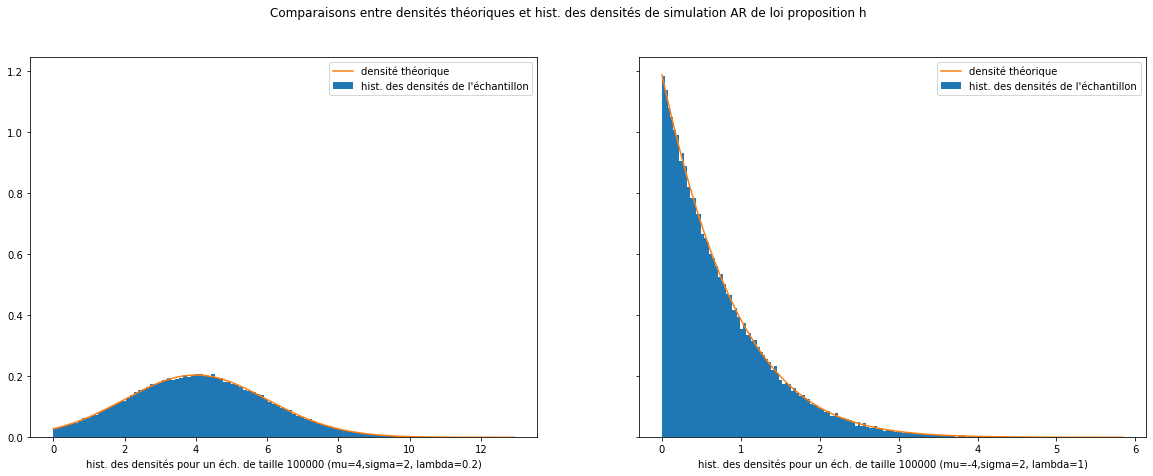

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True, figsize=(20,7))
fig.suptitle('Comparaisons entre densités théoriques et hist. des densités de simulation AR de loi proposition h ')


m = 4 
s = 2 
l = 0.2

print("proba d'acceptation pour (mu={0}, sigma={1}, lambda={2}) = {3} ".format(m,s,l,1/M_h(l,m,s)) )
echantillon = AR_h_V2(n,m,s,l)

ax1.hist(echantillon, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax1.plot(np.linspace(0,max(echantillon),50), st.norm.pdf(np.linspace(0,max(echantillon),50),loc=m,scale=s)/st.norm.cdf(m/s,loc=0,scale=1), label = "densité théorique")
ax1.set(xlabel="hist. des densités pour un éch. de taille {0} (mu={1},sigma={2}, lambda={3})".format(n,m,s,l))
ax1.legend()

m = -4
s = 2 
l = 1

print("proba d'acceptation pour (mu={0}, sigma={1}, lambda={2}) = {3} ".format(m,s,l,1/M_h(l,m,s)) )
echantillon = AR_h_V2(n,m,s,l)

ax2.hist(echantillon, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax2.plot(np.linspace(0,max(echantillon),100), st.norm.pdf(np.linspace(0,max(echantillon),100),loc=m,scale=s)/st.norm.cdf(m/s,loc=0,scale=1), label = "densité théorique")
ax2.set(xlabel="hist. des densités pour un éch. de taille {0} (mu={1},sigma={2}, lambda={3})".format(n,m,s,l))
ax2.legend()

plt.show()

Si l'on veut simuler la loi $f$ selon cette méthode, les paramètres $\mu$ et $\sigma$ restent fixés par l'utilisateur. Seul le paramètre $\lambda$ de la loi de proposition est variable. 

Faisons varier $\lambda$ à $\mu$ et $\sigma$ fixés :


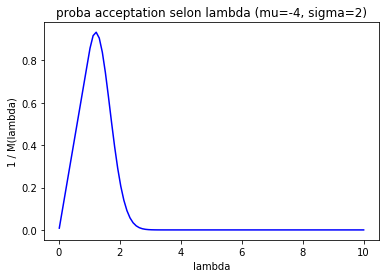

In [11]:
plt.plot(np.linspace(0.01,10,100),[1/M_h(l,m,s) for l in np.linspace(0.01,10,100)],"b")
plt.xlabel("lambda")
plt.ylabel("1 / M(lambda)")
plt.title("proba acceptation selon lambda (mu={0}, sigma={1})".format(m,s))
plt.show()


Pour maximiser la probabilité d'acceptation $\frac{1}{M(\lambda)}$, on minimise $M(\lambda)$ en $\lambda$.

On suppose dans un premier temps que $\mu < 0$.

$$
M(\lambda) = \left\{
    \begin{array}{ll}
        \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}} & \mbox{si} \lambda \in\: ]-\frac{\mu}{\sigma^2},+\infty[ \\
        \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda}  e^{-\frac{1}{2\sigma^2} \mu^2} & \mbox{si} \lambda \in\: ]0, -\frac{\mu}{\sigma^2}]
    \end{array}
\right.
$$

Sur $]0, -\frac{\mu}{\sigma^2}]$, $M(\lambda)$ est strictement décroissante, le minimum est donc atteint en $-\frac{\mu}{\sigma^2}$.

Sur $]-\frac{\mu}{\sigma^2},+\infty[$, 
\begin{align*}
M'(\lambda) & = -\frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma} \frac{1}{\lambda^2} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}} + \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} (\mu + \sigma^2 \lambda) e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}} \\
& = -\frac{1}{\lambda} M(\lambda) + (\mu + \sigma^2 \lambda) M(\lambda) \\
& = \frac{1}{\lambda} M(\lambda) (\sigma^2 \lambda^2 + \mu \lambda - 1)
\end{align*}

$\frac{1}{\lambda} M(\lambda) \neq 0 \; \forall \lambda \in ]-\frac{\mu}{\sigma^2},+\infty[$. Pour la nullité du polynôme :

\begin{align*}
\Delta = & \mu^2 + 4\sigma^2 > 0 \; \mbox{ il y a 2 racines réélles :} \\
\lambda_1 & = \frac{-\mu - \sqrt{\mu^2 + 4\sigma^2}}{2\sigma^2} < 0 \; \mbox{ cette racine est exclue}\\
\lambda_2 & = \frac{-\mu + \sqrt{\mu^2 + 4\sigma^2}}{2\sigma^2} > -\frac{\mu}{2\sigma^2} \\
\end{align*}

Comme $M'(\lambda)<0$ pour $\lambda<\lambda_2$ et $M'(\lambda)>0$ pour $\lambda>\lambda_2 $, le minimum global est atteint en $\lambda^* = \lambda_2 = \frac{-\mu + \sqrt{\mu^2 + 4\sigma^2}}{2\sigma^2} $. $\lambda^*$ dépend de $(\mu,\sigma)$ fixé par l'utilisateur.

Pour $\mu < 0$, la loi de proposition optimale (telle que la probabilité d'acceptation soit maximisée) est la loi $\mathcal{E}(\lambda^*)$.

Pour $\mu <0$ et avec cette loi de proposition optimale, a-t-on la probabilité d'acceptation supérieure à 0.5 ?

In [12]:
#borne sup de f/h optimale en l (la plus petite)
def M_h_opti(m,s):
    #assert m<0
    l = (-m + np.sqrt(m**2 + 4*s**2))/(2*s**2)
    if m+l*s**2 > 0:
        return np.exp(m*l + l**2*s**2/2)/(st.norm.cdf(m/s,loc=0,scale=1)*np.sqrt(2*np.pi)*s*l)
    else:
        return np.exp(-m**2/(2*s**2))/(st.norm.cdf(m/s,loc=0,scale=1)*np.sqrt(2*np.pi)*s*l)


In [13]:
m = -4
s = 2
1/M_h_opti(m,s) #proba acceptation maximal avec cette méthode pour ce m et ce s


0.9336453245094183

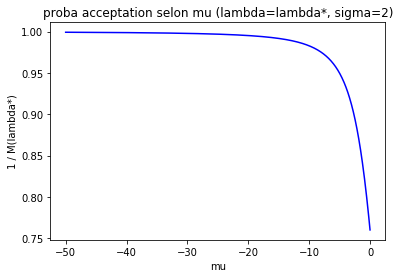

0


In [14]:
plt.plot(np.linspace(-50,-0.001,1000),[1/M_h_opti(m,s) for m in np.linspace(-50,-1e-5,1000)],"b")
plt.xlabel("mu")
plt.ylabel("1 / M(lambda*)")
plt.title("proba acceptation selon mu (lambda=lambda*, sigma={0})".format(s))
plt.show()

print(sum(([1/M_h_opti(m,s) < 0.5 for m in np.linspace(-50,-1e-5,1000)])*1))
#aucune proba d'acceptation inférieure à 0.5


Toutes les probabilités d'acceptation sont supérieures à $0.5$ pour une discrétisation de valeurs négatives de $\mu$. La méthode d'acceptation-rejet de proposition $h$ est donc bien meilleure pour les $\mu < 0$ que celle de proposition $g$.

On suppose dans un second temps que $\mu > 0$.

Alors $\forall \lambda > 0$,
$$
M(\lambda) = \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}}
$$

par les mêmes calculs que précédents, on trouve que $\lambda^* = \underset{\lambda>0}{\text{argmin}}\: M(\lambda)  = \lambda_2 = \frac{-\mu + \sqrt{\mu^2 + 4\sigma^2}}{2\sigma^2}\; (>0)$.



In [15]:
#AR_h_V2 avec proba acceptation optimale
def AR_h_V3(n,m,s):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi de proposition g
    #s = paramètre écart-type de la loi de proposition g
    
    resultat = []
    lresultat = 0
    M = M_h_opti(m,s)
    proba_accepte = 1/M
    h = st.expon(loc=0,scale=1/l)
    g = st.norm(loc=m,scale=s)
    Z = 1/st.norm.cdf(m/s,loc=0,scale=1)
    while lresultat < n:
        missing = n - lresultat
        n_simu = int(missing / proba_accepte)
        Y = h.rvs(size=n_simu)
        U = st.uniform.rvs(size=n_simu)
        
        accepte = (U <= Z*g.pdf(Y)/(M*h.pdf(Y))) & (Y > 0)
        if sum(accepte) > 0:
            resultat.append(Y[accepte])
        lresultat += sum(accepte)
        
    return np.r_[tuple(resultat)][0:(n-1)]

Comparons <code>AR_h_V1</code>, <code>AR_h_V2</code> et <code>AR_h_V3</code> en terme de temps de calcul, pour des paramètres fixés :

In [16]:
m = -4
s = 2
l = 0.3
print("mu = {0}, sigma = {1}, lambda = {2}".format(m,s,l))

start = time.time()
AR_h_V1(10_000, m, s, l)
end = time.time()
print("temps pour AR_h_V1 : {0}  -  proba acceptation = {1}".format(end-start,1/M_h(l,m,s)))

start = time.time()
AR_h_V2(10_000, m, s, l)
end = time.time()
print("temps pour AR_h_V2 : {0}  -  proba acceptation = {1}".format(end-start,1/M_h(l,m,s)))

start = time.time()
AR_h_V3(10_000, m, s)
end = time.time()
print("temps pour AR_h_V3 : {0}  -  proba acceptation = {1}".format(end-start,1/M_h_opti(m,s)))



mu = -4, sigma = 2, lambda = 0.3
temps pour AR_h_V1 : 20.118170976638794  -  proba acceptation = 0.2528215375728325
temps pour AR_h_V2 : 0.37369441986083984  -  proba acceptation = 0.2528215375728325
temps pour AR_h_V3 : 0.16083431243896484  -  proba acceptation = 0.9336453245094183


On préférera <code>AR_h_V3</code>.

Maintenant avec $\lambda^*$, faisons varier $\mu > 0$ : 

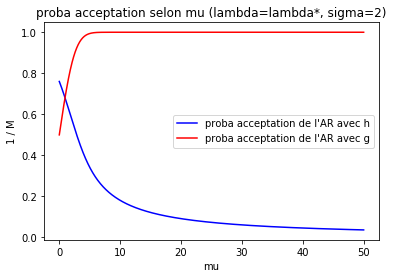

In [17]:
plt.plot(np.linspace(1e-5,50,1000),[1/M_h_opti(m,s) for m in np.linspace(1e-5,50,1000)],'b',label="proba acceptation de l'AR avec h")
plt.plot(np.linspace(1e-5,50,1000),[st.norm.cdf(m/s,loc=0,scale=1) for m in np.linspace(1e-5,50,1000)],'r',label="proba acceptation de l'AR avec g")
plt.xlabel("mu")
plt.ylabel("1 / M")
plt.title("proba acceptation selon mu (lambda=lambda*, sigma={0})".format(s))
plt.legend()
plt.show()

Pour $\mu>0$ il existe un certain seuil $\mu$ au-delà duquel la méthode d'acceptation-rejet de proposition $g$ est meilleure que celle de proposition $h$.

Ce seuil augmente lorsque le paramètre $\sigma$ augmente :

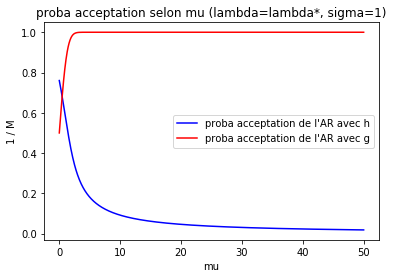

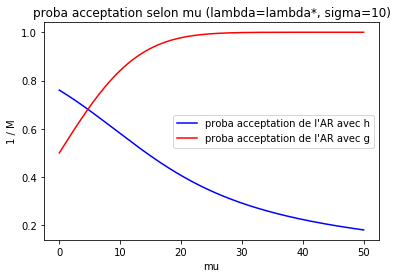

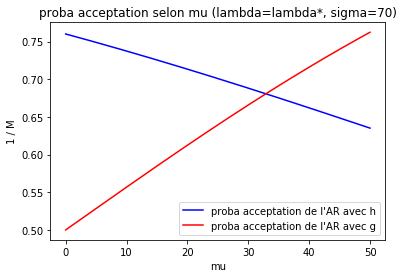

In [18]:
plt.figure(1)
plt.plot(np.linspace(1e-5,50,1000),[1/M_h_opti(m,1) for m in np.linspace(1e-5,50,1000)],'b',label="proba acceptation de l'AR avec h")
plt.plot(np.linspace(1e-5,50,1000),[st.norm.cdf(m/1,loc=0,scale=1) for m in np.linspace(1e-5,50,1000)],'r',label="proba acceptation de l'AR avec g")
plt.xlabel("mu")
plt.ylabel("1 / M")
plt.title("proba acceptation selon mu (lambda=lambda*, sigma={0})".format(1))
plt.legend()


plt.figure(2)
plt.plot(np.linspace(1e-5,50,1000),[1/M_h_opti(m,10) for m in np.linspace(1e-5,50,1000)],'b',label="proba acceptation de l'AR avec h")
plt.plot(np.linspace(1e-5,50,1000),[st.norm.cdf(m/10,loc=0,scale=1) for m in np.linspace(1e-5,50,1000)],'r',label="proba acceptation de l'AR avec g")
plt.xlabel("mu")
plt.ylabel("1 / M")
plt.title("proba acceptation selon mu (lambda=lambda*, sigma={0})".format(10))
plt.legend()


plt.figure(3)
plt.plot(np.linspace(1e-5,50,1000),[1/M_h_opti(m,70) for m in np.linspace(1e-5,50,1000)],'b',label="proba acceptation de l'AR avec h")
plt.plot(np.linspace(1e-5,50,1000),[st.norm.cdf(m/70,loc=0,scale=1) for m in np.linspace(1e-5,50,1000)],'r',label="proba acceptation de l'AR avec g")
plt.xlabel("mu")
plt.ylabel("1 / M")
plt.title("proba acceptation selon mu (lambda=lambda*, sigma={0})".format(70))
plt.legend()

plt.show()

En conclusion, la méthode d'acceptation-rejet de proposition $h$ optimale (<code>AR_h_V3</code>), est préférable si $\left[ \mu < 0 \right] \; ou \; \left[ \mu > 0 \; et \; \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda^*} e^{\mu \lambda^* + \frac{\lambda^{*2} \sigma^2}{2}} < \Phi(\frac{\mu}{\sigma}) \right] $. La dernière inégalité correspond à $ \frac{1}{M(\lambda^*)} > \frac{1}{M}$. La methode d'acceptation-rejet de proposition $g$ (<code>AR_g_V2</code>) est préfèrable sinon.

Méthode AR qui prend la loi de proposition qui a la plus grande probabilité d'acceptation (combinaison des fonctions <code>AR_h_V3</code> et <code>AR_g_V2</code>):

In [19]:
def AR_gh(n,m,s):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi cible
    #s = paramètre écart-type de la loi cible
    
    if st.norm.cdf(m/s,loc=0,scale=1) > 1/M_h_opti(m,s) :
        resultat = AR_g_V2(n,m,s)
        print("loi de proposition g utilisée")
    else:
        resultat = AR_h_V3(n,m,s)
        print("loi de proposition h utilisée")
        
    return resultat

AR_gh(5,m,s)

loi de proposition h utilisée


array([0.91707097, 0.69049446, 0.65163381, 0.88275357])

---

### Supplément question 2 : méthode d'inversion

On sait que $F(x) = \frac{G(x) - G(0)}{1 - G(0)} = y \iff G(x) = y(1-G(0)) + G(0) \iff x = G^{-1}\left( y(1-G(0)) + G(0) \right) = F^{-1}(y)$ 

car $G$ est la fonction de répartition de $\mathcal{N}(\mu,\sigma^2)$ qui est une loi continue : G est continue et strictement croissante donc elle est bijective (sa bijection réciproque $G^{-1}$ est la fonction quantile de $\mathcal{N}_d(\mu,\sigma^2)$).

Par le Théorème d'inversion, pour $U \sim \mathcal{U}(]0,1[), F^{-1}(U) \sim \mathcal{N}_{>0}(\mu,\sigma^2)$

In [20]:
def Inv(n,m,s):
    U = st.uniform.rvs(size=n)
    return st.norm.ppf(U*(1-st.norm.cdf(0,loc=m,scale=s))+st.norm.cdf(0,loc=m,scale=s),loc=m,scale=s)


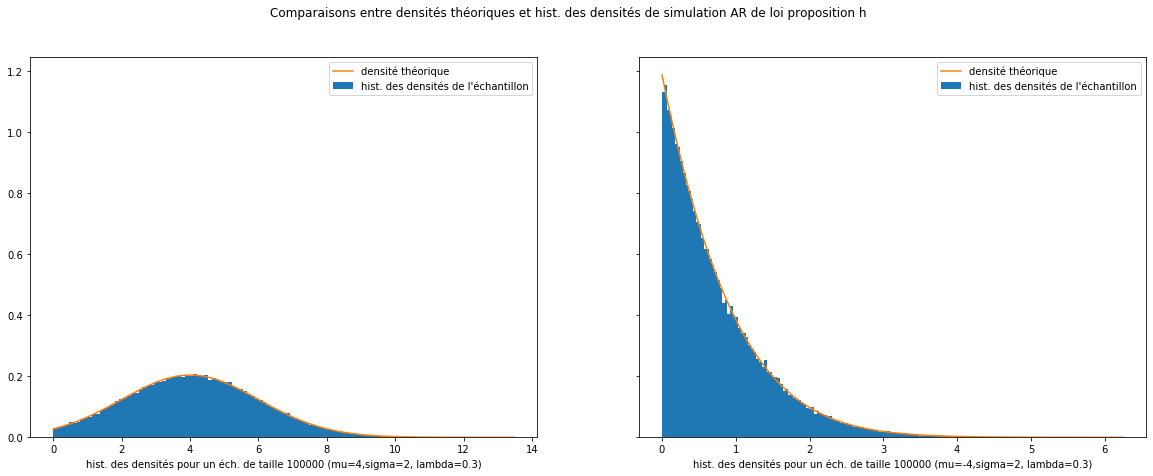

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True, figsize=(20,7))
fig.suptitle('Comparaisons entre densités théoriques et hist. des densités de simulation AR de loi proposition h ')


m = 4 
s = 2 

echantillon = Inv(n,m,s)

ax1.hist(echantillon, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax1.plot(np.linspace(0,max(echantillon),50), st.norm.pdf(np.linspace(0,max(echantillon),50),loc=m,scale=s)/(1-st.norm.cdf(0,loc=m,scale=s)), label = "densité théorique")
ax1.set(xlabel="hist. des densités pour un éch. de taille {0} (mu={1},sigma={2}, lambda={3})".format(n,m,s,l))
ax1.legend()

m = -4
s = 2 

echantillon = Inv(n,m,s)

ax2.hist(echantillon, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax2.plot(np.linspace(0,max(echantillon),100), st.norm.pdf(np.linspace(0,max(echantillon),100),loc=m,scale=s)/(1-st.norm.cdf(0,loc=m,scale=s)), label = "densité théorique")
ax2.set(xlabel="hist. des densités pour un éch. de taille {0} (mu={1},sigma={2}, lambda={3})".format(n,m,s,l))
ax2.legend()

plt.show()

Comparons <code>AR_gh</code> et <code>Inv</code> en terme de temps de calcul, à paramètres fixés :

In [22]:
m = 1
s = 2 
print("mu = {0}, sigma = {1}".format(m,s))

start = time.time()
AR_gh(100_000, m, s)
end = time.time()
print("temps pour AR_gh : {0}".format(end-start))

start = time.time()
Inv(100_000, m, s)
end = time.time()
print("temps pour Inv : {0}".format(end-start))

print("--------------------------------------------")

m = -10
s = 5
print("mu = {0}, sigma = {1}".format(m,s))

start = time.time()
AR_gh(100_000, m, s)
end = time.time()
print("temps pour AR_gh : {0}".format(end-start))

start = time.time()
Inv(100_000, m, s)
end = time.time()
print("temps pour Inv : {0}".format(end-start))


mu = 1, sigma = 2
loi de proposition g utilisée
temps pour AR_gh : 1.084986686706543
temps pour Inv : 0.023836374282836914
--------------------------------------------
mu = -10, sigma = 5
loi de proposition h utilisée
temps pour AR_gh : 1.1400268077850342
temps pour Inv : 0.034766435623168945


---

### Question 3 : Echantillonnage de Gibbs

On cherche à simuler par échantillonnage de Gibbs le vecteur aléatoire $(N_1,\dots,N_d) = (X_1|X_1 > 0,\dots,X_d|X_d > 0)$. On exprime les lois conditionnelles.

i) Dans un premier temps, on considère le cas $d=2$. On cherche à exprimer les lois conditionnelles du vecteur aléatoire $(N_1,N_2) = (X_1|X_1 > 0, X_2|X_2 > 0) \sim \mathcal{N}_{>0,2}(\mu,\Sigma)$ (on rappelle que $(X_1,X_2) \sim \mathcal{N}_2(\mu,\Sigma)$ de densité $g$), de densité : $ f(x_1,x_2) = f_{(N_1,N_2)}(x_1,x_2) = Z(\mu,\Sigma) g(x_1,x_2)\mathbb{1}_{]0,+\infty[^2}(x_1,x_2)$ .


- Montrons que $N_1|N_2$ est encore une loi normale tronquée :

$\forall x_2>0$

\begin{align*}
f_{N_1|N_2}(x_1|x_2) & = \frac{f(x_1,x_2)}{f_{N_2}(x_2)} \\
& = \frac{ f(x_1,x_2) }{\int_{]0,+\infty [} f(t,x_2) dt} \\
& = \frac{Z(\mu,\Sigma) g(x_1,x_2) \mathbb{1}_{]0,+\infty[}(x_1) }{\int_{]0,+\infty[} Z(\mu,\Sigma) g(t,x_2) dt} \\
& = \frac{g(x_1,x_2)}{\int_{]0,+\infty[} g(t,x_2) dt} \mathbb{1}_{]0,+\infty[}(x_1) \\
& = \frac{g_{X_1|X_2}(x_1|x_2) g_{X_2}(x_2)}{\int_{]0,+\infty[} g_{X_1|X_2}(t|x_2) g_{X_2}(x_2) dt} \mathbb{1}_{]0,+\infty[}(x_1) \\
& = \frac{g_{X_1|X_2}(x_1|x_2)}{\int_{]0,+\infty[} g_{X_1|X_2}(t|x_2) dt} \mathbb{1}_{]0,+\infty[}(x_1) 
\end{align*}

Comme $X_1|X_2$ suit une loi normale, par définition de la loi normale tronquée on a bien $N_1|N_2$ qui suit une loi normale tronquée à $]0,+\infty[$.

- On exhibe les paramètres des lois conditionnelles :

Soit $Q = \Sigma^{-1} = 
\left(
\begin{array}{ll}
    q_{11} & q_{12} \\
    q_{12} & q_{22} 
\end{array}
\right)
$

A partir de la densité $f$ ,on exprime $f_{N_1|N_2}(x_1|x_2)$ à une constante près pour déduire les paramètres de sa loi.

$\forall x_1>0, x_2>0$, 

$x_1 \mapsto f(x_1,x_2) = \frac{Z(\mu,\Sigma)}{2\pi\sqrt{|\Sigma|}}\: \exp \{ -\frac{1}{2} (x_1-\mu_1 \: x_2-\mu_2) Q 
\left(
\begin{array}{l}
    x_1-\mu_1 \\
    x_2-\mu_2
\end{array}
\right)
\}
$

$
= \frac{Z(\mu,\Sigma)}{2\pi\sqrt{|\Sigma|}}\: \exp \{ -\frac{1}{2} ( q_{11}(x_1-\mu_1)^2 + q_{22}(x_2 - \mu_2)^2 + 2q_{12}(x_1-\mu_1)(x_2 - \mu_2) ) \} $


Ainsi,

\begin{align*}
x_1 \mapsto f_{N_1|N_2}(x_1|x_2) & \propto \exp \{-\frac{1}{2} ( q_{11} x_1^2  - 2 \mu_1 q_{11} x_1 + 2 q_{12} x_1 x_2 - 2 q_{12} \mu_2 x_1 ) \} \\
& \propto \exp \{-\frac{q_{11}}{2} ( x_1^2 - \frac{q_{11} \mu_1 + q_{12} \mu_2 - q_{12} x_2}{q_{11}} x_1 ) \} \\
& \propto \exp \{ -\frac{1}{2\frac{1}{q_{11}}} (x_1 - (\mu_1 + \frac{q_{12} \mu_2 - q_{12} x_2}{q_{11}} ) )^2 \}
\end{align*}

On en déduit que $\forall x_2 > 0$, $N_1|N_2 = x_2 \sim \mathcal{N}_{>0}(\mu_1 + \frac{q_{12} \mu_2 - q_{12} x_2}{q_{11}},\frac{1}{q_{11}})$



Par symétrie des notations : $\forall x_1 > 0$, $N_2|N_1 = x_1 \sim \mathcal{N}_{>0}(\mu_2 + \frac{q_{12} \mu_1 - q_{12} x_1}{q_{22}},\frac{1}{q_{22}})$.


ii) Dans un second temps, on se ramène au cas $d>2$ en considérant les vecteurs et matrices définis par blocs.
On cherche à exprimer les lois conditionnelles du vecteur aléatoire ($1$ composante sachant les $d-1$ autres) $(N_1,\dots,N_d) = (X_1|X_1 > 0, \dots, X_d|X_d > 0) \sim \mathcal{N}_{>0,d}(\mu,\Sigma)$ (on rappelle que $(X_1,\dots,X_d) \sim \mathcal{N}_d(\mu,\Sigma)$ de densité $g$), de densité : $ f(x_1,\dots,x_d) = f_{(N_1,\dots,N_d)}(x_1,\dots,x_d) = Z(\mu,\Sigma) g(x_1,\dots,x_d)\mathbb{1}_{]0,+\infty[^d}(x_1,\dots,x_d)$.

Via l'écriture par bloc : pour $i \in \{1,\dots,n\}, (N_i,N_{-i}) = (N_i,\dots, N_{i-1},  N_{i+1}, \dots,N_d)$, et $N_i|N_{-i} = N_i | (N_1, \dots, N_{i-1},  N_{i+1}, \dots, N_d)$


- De la même manière on montre que $N_i|N_{-i}$ est encore une loi normale tronquée :

$\forall x_{-i} \in (\mathbb{R}_+^*)^{d-1}$,

\begin{align*}
f_{N_i|N_{-i}}(x_i|x_{-i}) & = \frac{f(x_i,x_{-i})}{f_{N_{-i}}(x_{-i})} \\
& = \frac{ f(x_i,x_{-i}) }{\int_{]0,+\infty [} f(t,x_{-i}) dt} \\
& = \frac{Z(\mu,\Sigma) g(x_i,x_{-i}) \mathbb{1}_{]0,+\infty[}(x_i) }{\int_{]0,+\infty[} Z(\mu,\Sigma) g(t,x_{-i}) dt} \\
& = \frac{g(x_i,x_{-i})}{\int_{]0,+\infty[} g(t,x_{-i}) dt} \mathbb{1}_{]0,+\infty[}(x_i) \\
& = \frac{g_{X_i|X_{-i}}(x_i|x_{-i}) g_{X_{-i}}(x_{-i})}{\int_{]0,+\infty[} g_{X_i|X_{-i}}(t|x_{-i}) g_{X_{-i}}(x_{-i}) dt} \mathbb{1}_{]0,+\infty[}(x_i) \\
& = \frac{g_{X_i|X_{-i}}(x_i|x_{-i})}{\int_{]0,+\infty[} g_{X_i|X_{-i}}(t|x_{-i}) dt} \mathbb{1}_{]0,+\infty[}(x_i) 
\end{align*}

Comme $X_i|X_{-i}$ suit une loi normale, par définition de la loi normale tronquée on a bien $N_i|N_{-i}$ qui suit une loi normale tronquée à $]0,+\infty[$.


- De la même manière on exhibe les paramètres des lois conditionnelles :

Soit $Q = \Sigma^{-1} = 
\left(
\begin{array}{ll}
    q_{i,i} & q_{i,-i} \\ 
    q_{-i,i} & q_{-i,-i} 
\end{array}
\right)
\;\; q_{i,i} \in \mathbb{R},\; q_{-i,i} = q_{i,-i}' \in \mathbb{R}^{d-1},\; q_{-i,-i}$ matrice réélle de taille $(d-1)\times(d-1)$.
$


A partir de la densité $f$ ,on exprime $f_{N_i|N_{-i}}(x_i|x_{-i})$ à une constante près pour déduire les paramètres de sa loi.

$\forall x_i>0, x_{-i} \in (\mathbb{R}_+^*)^{d-1}$, 

$x_i \mapsto f(x_i|x_{-i}) = \frac{Z(\mu,\Sigma)}{\sqrt{(2\pi)^d|\Sigma|}} \exp \{ -\frac{1}{2} 
\left(
\begin{array}{l}
    x_i-\mu_i \\
    x_{-i}-\mu_{-i}
\end{array}
\right)'
Q 
\left(
\begin{array}{l}
    x_i-\mu_i \\
    x_{-i}-\mu_{-i}
\end{array}
\right)
\}
$

$
= \frac{Z(\mu,\Sigma)}{2\pi\sqrt{|\Sigma|}} \exp \{-\frac{1}{2} \{ q_{i,i}(x_i-\mu_i)^2 + q_{-i,-i}(x_{-i} - \mu_{-i})^2 + 2q_{i,-i}(x_i-\mu_i)(x_{-i} - \mu_{-i}) \} \} $


Ainsi,

\begin{align*}
x_i \mapsto f_{N_i|N_{-i}}(x_i|x_{-i}) & \propto \exp \{-\frac{1}{2} ( q_{i,i} x_i^2  - 2 \mu_i q_{i,i} x_i + 2 q_{i,-i} x_i x_{-i} - 2 q_{i,-i} \mu_{-i} x_i ) \} \\
& \propto \exp \{-\frac{q_{i,i}}{2} ( x_i^2 - \frac{q_{i,i} \mu_i + q_{i,-i} \mu_{-i} - q_{i,-i} x_{-i}}{q_{i,i}} x_i ) \} \\
& \propto \exp \{ -\frac{1}{2\frac{1}{q_{i,i}}} (x_i - (\mu_i + \frac{q_{i,-i} \mu_{-i} - q_{i,-i} x_{-i}}{q_{i,i}} ) )^2 \}
\end{align*}

On en déduit que $\forall x_{-i} \in (\mathbb{R}_+^*)^{d-1}$, $N_i|N_{-i} = x_{-i} \sim \mathcal{N}_{>0}(\mu_i + \frac{q_{i,-i} \mu_{-i} - q_{i,-i} x_{-i}}{q_{i,i}},\frac{1}{q_{i,i}})$

Schéma de l'algorithme d'échantillonnage de Gibbs : 

initialisation : $x^{(0)} = (x_1^{(0)}, \dots, x_d^{(0)})$

Pour $j$ allant de $1$ à $n$ :

Pour $i$ allant de $1$ à $d$ :

on génère $x_i^{(j+1)}$ selon $f_{N_i|N_{-i}}( \bullet | x_1^{(j+1)}, \dots,x_{i-1}^{(j+1)}, x_{i+1}^{(j)} ,\dots , x_d^{(j)} )$


Un échantillon $j$ approche une génération du vecteur aléatoire $ (N_1,\dots,N_d)$

In [164]:

#définit les paramètres de la loi conditionnelle
def params(i, m, Q, X):
    #donne les parametres de la loi conditionnelle N_i|N_-i
    # i : indice du composant du vecteur aléatoire
    # m : parametre moyenne de la loi cible (np.array en ligne)
    # Q : inverse du parametre matrice de variance-covariance de la loi cible
    # X : valeur de la chaine pour une etape (vecteur de dimension d)
    
    d = m.shape[1]
    m_x = m[:,i]-np.sum([Q[i,j]*(X[j]-m[:,j]) for j in range(d) if j != i])/Q[i,i]
    s_x = np.sqrt(1/Q[i,i])
    return(m_x, s_x)


#Echantillonnage de Gibbs
def Gibbs_Sampler(n, m, S, X0):
    #n : nombre de simulations, nombre de transiitions de la chaine
    #m : parametre moyenne de la loi cible (np.array en ligne)
    #S : parametre matrice de variance-covariance de la loi cible
    #X0 : valeur initiale de la chaine
    
    d = m.shape[1]
    Q = np.linalg.inv(S)
    X = [list(X0)]
    for _n in range(n):
        for i in range(d):
            m_x, s_x = params(i, m, Q, X0)
            X0[i] = Inv(1,m_x, s_x)
        X.append(list(X0))
    return(np.array(X)[1:,:])


In [216]:
#valeurs des paramètres
n = 10_000
m = np.array([[0,-3,3]])
S = np.array([[2,0.1,-0.1],
              [0.1,3,0.1],
              [-0.1,0.1,4]])
X0 = st.expon.rvs(size = 3)

X = Gibbs_Sampler(n, m, S, X0)


On s'intéresse aux histogrammes des densités de chaque composante du vecteur simulé :

In [217]:
#histogramme des densités pour chaque composante du vecteur simulé
def plot_Gibbs(X, m, S, burnin = 100):
    #X : simulations du vecteur aléatoire par Gibbs_Sampler
    #m : parametre moyenne de la loi cible (vecteur de taille (d,))
    #S : parametre matrice de variance-covariance de la loi cible
    #burnin : les premières itérations de la chaîne peuvent ne pas êtres considérées (par défaut 100)
    #car la chaîne est encore trop éloigné de la loi de proba limite (par le théorème ergodique)
    
    d = m.shape[1]
    fig, axs = plt.subplots(d, figsize = (7,14))
    fig.suptitle('Densités et hist. des densités des simulations, pour chaque composant du vecteur simulé')
    x = np.linspace(0, 50, 10_000)
    for t in range(d):
        y = st.norm.pdf(x, loc = m[0,t], scale = np.sqrt(S[t,t]))/st.norm.cdf(m[0,t]/np.sqrt(S[t,t]))
        axs[t].hist(X[burnin:,t], density = True, bins = "auto")
        axs[t].plot(x, y)
        axs[t].set(xlabel = "Densité et hist. des densités de la simulation du composant {0}".format(t+1) )
        

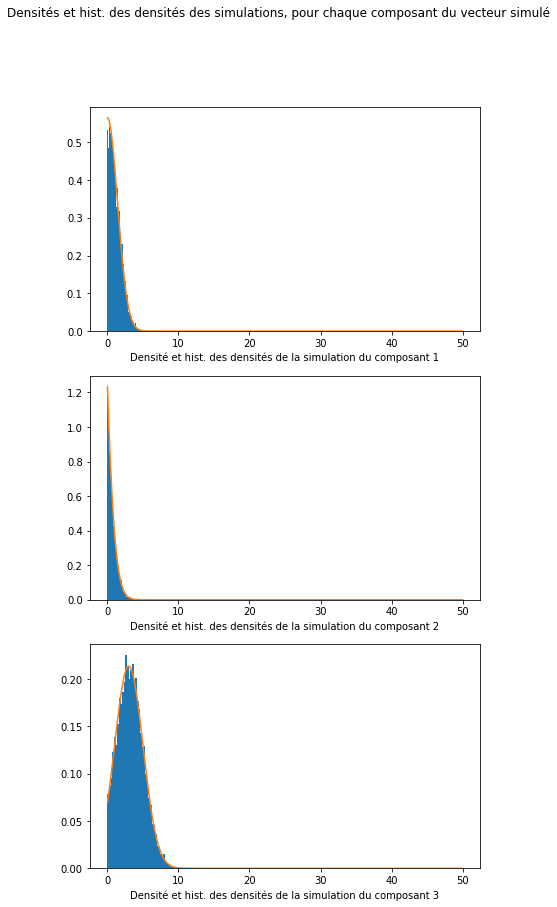

In [218]:
plot_Gibbs(X, m, S)

On s'intéresse aux trajectoires de la chaîne simulé, composante par composante :

In [27]:
def trajectoire_marginale(X):
    n = X.shape[0]
    for i in range(X.shape[1]):
        fig, ax = plt.subplots()
        ax.plot(np.linspace(1,n,n), X[:,i],linewidth=0.7)
        ax.set(xlabel='trajectoire des simulations du composant {0}'.format(i+1))
        

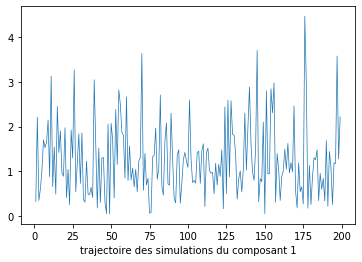

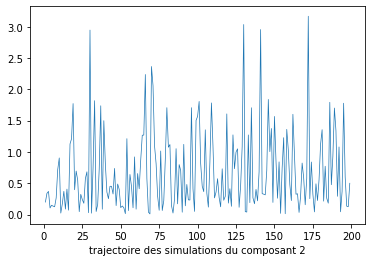

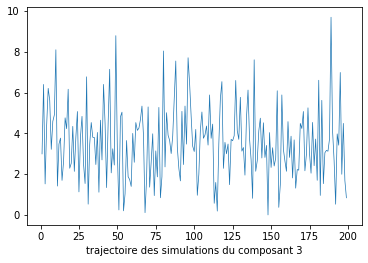

In [28]:
#trajectoires de chaque composante, pour les 200 premières itérations de la chaine
trajectoire_marginale(X[0:199,:])

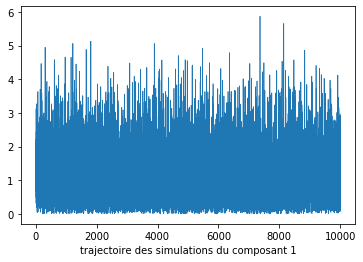

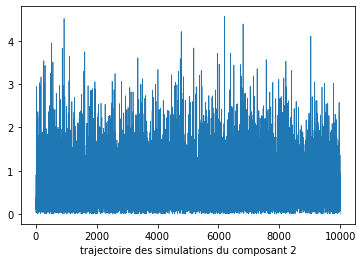

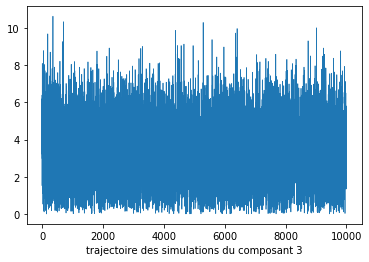

In [29]:
#trajectoires de chaque composante, de toute la chaîne
trajectoire_marginale(X)

Il n'y a pas de pattern apparent dans les trajectoires. La moyenne et la variance ne semblent pas dépendre de l'indice (de temps) de la chaîne. En d'autres termes, rien ne laisse voir, graphiquement, que ces trajectoires ne soient pas une génération aléatoire.

On s'intéresse aux autocorrélations estimées du processus généré, en chaque composante :

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

def autocorrelation(X):
    for i in range(X.shape[1]):
        fig, ax = plt.subplots()
        plot_acf(x=X[:, i], lags=100, ax=ax, marker =".", title='autocorrélations estimées des simulations du composant {0}'.format(i+1))
        

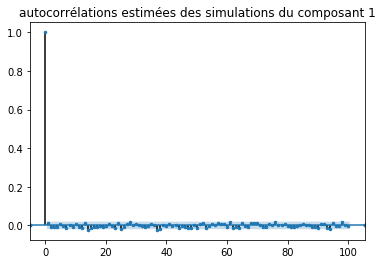

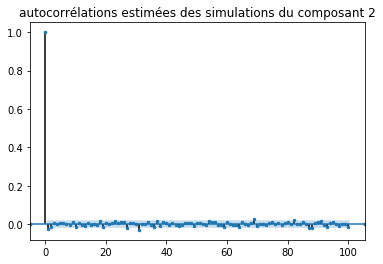

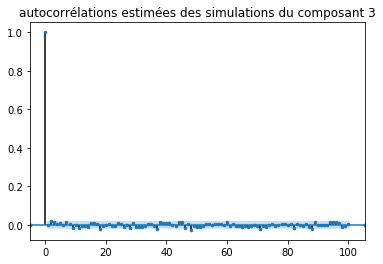

In [31]:
autocorrelation(X)

Les autocorrélations sont significativement nulles, car elles sont contenues dans l'intervalle de confiance de nullité, de niveau (asymptotique) $95%$. Les corrélations (et donc les covariances) entre 2 instants de la chaîne ne semblent pas dépendre de la position de la chaîne (i.e. du temps).

Comme la moyenne, la variance et les corrélations (covariances) ne dépendent pas de l'instant de la chaîne, le processus paraît stationnaire (au sens faible).

Ainsi le vecteur aléatoire de loi $\mathcal{N}_{>0,3}(\mu =
\left(
\begin{array}{l}
0 \\
-3 \\
3
\end{array}
\right),
\Sigma =
\left(
\begin{array}{lll}
2 & 0.1 & -0.1 \\
0.1 & 3 & 0.1 \\
-0.1 & 0.1 & 4
\end{array}
\right)
)
$ est bien simulé dans ce cas où les composantes sont peu liées entre elles, et la matrice $\Sigma$ est "facilement" inversible (détérminant très éloigné de $0$).

Le paramètre $\mu$ ne modifie pas grandement les performances de l'échantillonnage de Gibbs : comme pour la loi normale classique, il sert de paramètre de position. Le mode de la loi marginale $i$ est d'autant plus proche de $\mu_i$ que $\frac{q_{i,-i} \mu_{-i} - q_{i,-i} N_{-i}}{q_{i,i}}$ est faible, c'est-à-dire lorsque les $N_{-i}$ ont eux aussi leurs modes proches de $\mu_{-i}$.

Contrairement aux méthodes d'acceptation-rejet, il n'y a pas de sensibilité de l'algorithme par rapport aux signes de $\mu$ (ou du moins aux signes de ses composantes).

Prenons le cas où $\Sigma$ est "difficilement" inversible (détérminant proche de $0$).

In [169]:
n = 1_000
m = np.array([[0,-3,3]])
S = np.array([[1,0.9,0.9],
              [0.9,1,0.9],
              [0.9,0.9,1]])

X = Gibbs_Sampler(n, m, S, X0)

#déterminant de S 
print(np.linalg.det(S))

#matrice de précision Q 
print(np.linalg.inv(S))

#valeurs propres de S 
print(np.linalg.eig(S)[0])


0.02799999999999999
[[ 6.78571429 -3.21428571 -3.21428571]
 [-3.21428571  6.78571429 -3.21428571]
 [-3.21428571 -3.21428571  6.78571429]]
[0.1 2.8 0.1]


In [170]:
X

array([[2.73656097, 0.0484966 , 5.82401031],
       [2.86650333, 0.25757799, 5.32574764],
       [2.36933214, 0.25365226, 5.5711808 ],
       ...,
       [2.78000412, 0.0585421 , 5.84010036],
       [2.78062061, 0.01988664, 6.65630812],
       [2.71669709, 0.66433222, 5.6160834 ]])

On observe de mauvaises simulations de l'échantillonnage de Gibbs : les densités marginales théoriques ne correspondent pas aux histogrammes des densités des composantes du vecteur simulé.

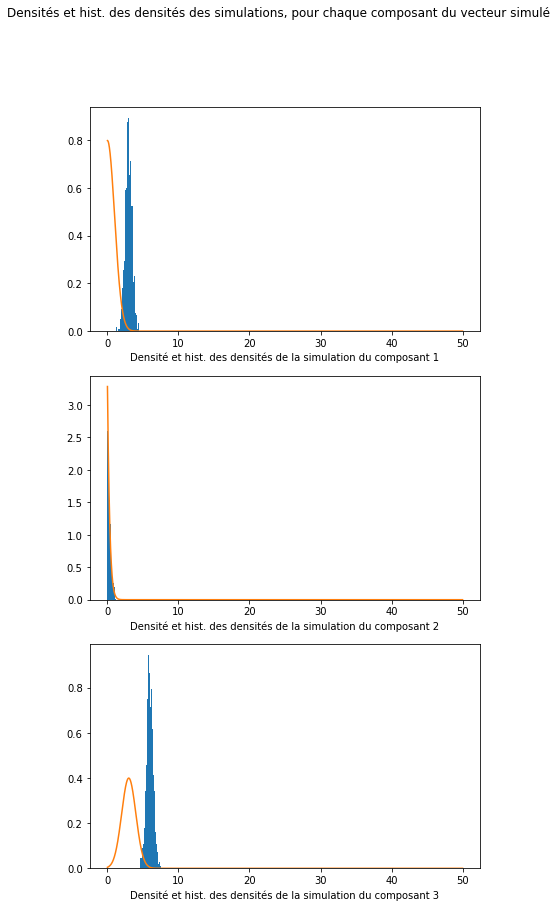

In [171]:
plot_Gibbs(X, m, S)

Les trajectoires confirment qu'il y a un biais dans les modes empiriques des lois marginales simulées.

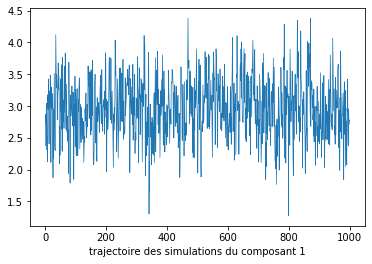

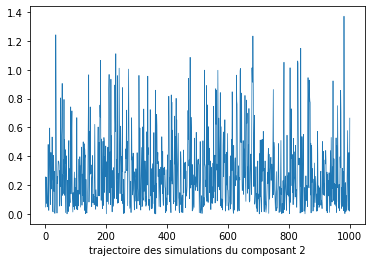

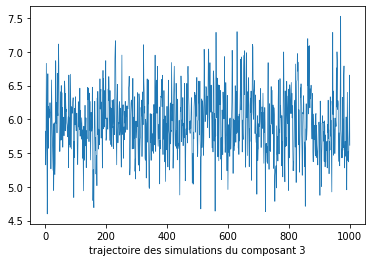

In [172]:
#trajectoires de chaque composante, de toute la chaîne
trajectoire_marginale(X)

Dans une composante de la chaîne, il y a une autocorrélation significative (et positive) pour les simulations proches (qui se suivent) : cela jusqu'à 6 simulations d'affilées. En d'autres termes la chaîne ne bouge pas suffisament dans le support marginal (et donc dans le support de la loi jointe). On ne peut pas dire que l'on a simulé de manière indépendante le vecteur aléatoire.

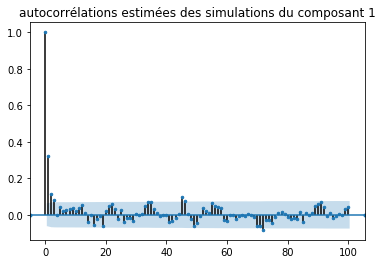

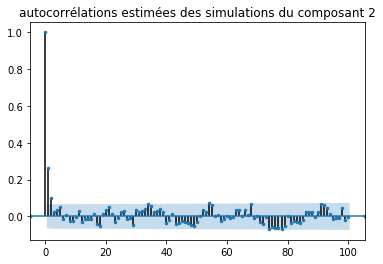

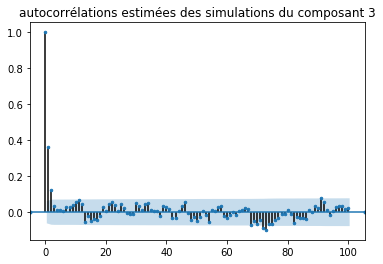

In [173]:
autocorrelation(X)

Ainsi dans le cas de matrice de variance-covariance "difficilement" inversible, l'échantillonnage de Gibbs ne fonctionne pas.

### Question 4 : Approche MCMC-MLE 

A partir d'un échantillon simulé selon une loi normale tronquée à $]0,+\infty[^d $, on cherche à estimer ses paramètres $\mu$ et $\Sigma$, par maximum de vraisemblance.

Le modèle statistique est le suivant : $\{ (\mathbb{R}_+^{*d})^n \:;\: \mathcal{B}(\mathbb{R}_+^{*d})^{\otimes n} \:;\: \mathbb{P}_{\mu,\Sigma} = p_{\mu,\Sigma}^{\otimes n} \:\text{où}\: p_{\mu,\Sigma} = \mathcal{N}_{>0,d}(\mu,\Sigma) \:;\: \mu \in \mathbb{R}^d, \Sigma \in \mathcal{S}_d^+(\mathbb{R}) \}$ 

$\mathbb{P}_{\mu,\Sigma}$ est dominée par la mesure de Lebesgue $\lambda^{\otimes n}$, et admet donc une densité par rapport à $\lambda^{\otimes n}$.

L'échantillon est noté $x = (x_1, \dots, x_n)$. La vraisemblance du modèle est :

\begin{align*}
L(x ; \mu, \Sigma) & = \prod_{i=1}^{n} f(x_i;\mu,\Sigma) \\
& = \prod_{i=1}^{n}  Z(\mu,\Sigma) \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x_i-\mu)' \Sigma^{-1} (x_i-\mu)} \\
& = Z(\mu,\Sigma)^n \frac{1}{(\sqrt{(2\pi)^d |\Sigma|})^n} e^{-\frac{1}{2} \sum_{i=1}^{n} (x_i-\mu)' \Sigma^{-1} (x_i-\mu)}
\end{align*}

La log-vraisemblance du modèle est :
\begin{align*}
l(x ; \mu, \Sigma) & = n \ln(Z(\mu,\Sigma)) - \frac{n}{2} \ln((2\pi)^d |\Sigma|) - \frac{1}{2} \sum_{i=1}^{n} (x_i-\mu)' \Sigma^{-1} (x_i-\mu)
\end{align*}
 
 
Or $Z(\mu,\Sigma) = \frac{1}{\int_{]0,+\infty[^d} g(t) dt} = \frac{1}{\int_{]0,+\infty[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (t-\mu)' \Sigma^{-1} (t-\mu)} dt} =  \frac{1}{I(\mu,\Sigma)}$ fait intervenir une intégrale, notée $I(\mu,\Sigma)$, dont l'intégrande dépend des paramètres. La log-vraisemblance n'a donc pas une forme close.


L'approche MC-MLE consiste à remplacer $I$ dans la log-vraisemblance par un estimateur de Monte-Carlo, ici celui par Important Sampling où la loi de proposition notée $f_1$ est de même loi que celle du modèle mais avec des paramètres $\mu' et \Sigma'$ choisis (de manière à avoir une bonne approximation de l'intégrale). 

Ainsi $f_1$ est la densité de $\mathcal{N}_{>0,d}(\mu',\Sigma')$, donc de la forme $f_1 = Z(\mu',\Sigma')  g_1 \mathbb{1}_{]0,+\infty[^d}$, où $g_1$ est la densité de $\mathcal{N}_{d}(\mu',\Sigma')$.

On refait le raisonnement de l'Important Sampling :

\begin{align*}
I(\mu,\Sigma) & = \int_{]0,+\infty[^d} g(t) dt = \mathbb{E}_g[\mathbb{1}_{]0,+\infty[^d}(X)] \\
& = \int_{\mathbb{R}^d} \mathbb{1}_{]0,+\infty[^d} \frac{g(t)}{f_1(t)} f_1(t) dt = \mathbb{E}_{f_1} [\mathbb{1}_{]0,+\infty[^d}(Y) \frac{g(Y)}{f_1(Y)}] \\
& = \frac{1}{Z(\mu',\Sigma')} \int_{\mathbb{R}^d} \frac{g(t)}{g_1(t)} f_1(t) dt = \frac{1}{Z(\mu',\Sigma')} \mathbb{E}_{f_1} [\frac{g(Y)}{g_1(Y)}]
\end{align*}

L'estimateur de Monte-Carlo par Important Sampling de $I$ est : $\hat{I}(\mu,\Sigma) = \frac{1}{Z(\mu',\Sigma')N} \sum_{j=1}^{N}\frac{g(Y_j)}{g_1(Y_j)} \;$ où $Y_1,\dots,Y_N \sim f_1$.

On peut chercher la loi $f_1$, c'est-à-dire les paramètres $(\mu',\Sigma')$, telle que la variance $\mathbb{V}_{f_1}(\hat{I}(\mu,\Sigma))$ soit minimale. On cherche donc à minimiser la fonction : $f_1 \mapsto \mathbb{V}_{f_1}(\hat{I}(\mu,\Sigma))$ ou encore $(\mu',\Sigma') \mapsto \mathbb{V}_{\mu',\Sigma'}(\hat{I}(\mu,\Sigma))$.

\begin{align*}
\mathbb{V}_{f_1}(\hat{I}(\mu,\Sigma)) & = \mathbb{V}_{f_1}( \frac{1}{Z(\mu',\Sigma')N} \sum_{j=1}^{N}\frac{g(Y_j)}{g_1(Y_j)} ) \\ 
& = \frac{1}{N^2} N \mathbb{V}_{f_1}( \frac{1}{Z(\mu',\Sigma')} \frac{g(Y)}{g_1(Y)} ) \\
& = \frac{1}{N} \left( \mathbb{E}_{f_1}[\frac{1}{Z(\mu',\Sigma')^2} \frac{g(Y)^2}{g_1(Y)^2}] - I^2  \right)
\end{align*}

Minimiser cette variance revient à minimiser $critère(f_1) = \mathbb{E}_{f_1}[\frac{1}{Z(\mu',\Sigma')^2} \frac{g(Y)^2}{g_1(Y)^2}]$ :

\begin{align*}
critère(f_1)  = \mathbb{E}_{f_1}[\frac{1}{Z(\mu',\Sigma')^2} \frac{g(Y)^2}{g_1(Y)^2}] \overset{\text{inegalité Jensen}}{\geq} \mathbb{E}_{f_1}[\frac{1}{Z(\mu',\Sigma')} \frac{g(Y)}{g_1(Y)}]^2 & = \left( \frac{1}{Z(\mu',\Sigma')} \int_{\mathbb{R}} \frac{g(y)}{g_1(y)} f_1(y) dy \right)^2 \\
& = \left( \int_{]0,+\infty[} g(y) dy  \right)^2 \\
& = \frac{1}{Z(\mu,\Sigma)^2} = I^2 
\end{align*}

Ce minorant ($I^2$) est atteint lorsque $g_1 = g$, i.e. $Z(\mu',\Sigma') = Z(\mu,\Sigma)$, i.e. $f_1 = f$, i.e. $(\mu',\Sigma') = (\mu,\Sigma)$. Il faut donc choisir $(\mu',\Sigma')$ le plus proche possible des vrais paramètres.


La log-vraisemblance du modèle par l'approche MC-MLE se réécrit, pour tout $(\mu', \Sigma')$ fixé, pour tout échantillon fixé $y$ de taille $N$ généré selon $\mathcal{N}_{>0,d}(\mu', \Sigma')$ :

\begin{align*}
l^{MC}(x ; \mu, \Sigma) & = - n \ln(\hat{I}(\mu,\Sigma)) - \frac{n}{2} \ln((2\pi)^d |\Sigma|) - \frac{1}{2} \sum_{i=1}^{n} (x_i-\mu)' \Sigma^{-1} (x_i-\mu) \\
& = - n \ln \left(\frac{1}{Z(\mu',\Sigma')N} \sum_{j=1}^{N}\frac{g(y_j)}{g_1(y_j)} \right) - \frac{n}{2} \ln((2\pi)^d |\Sigma|) - \frac{1}{2} \sum_{i=1}^{n} (x_i-\mu)' \Sigma^{-1} (x_i-\mu)
\end{align*}

Les estimateurs du maximum de vraisemblance par Monte-Carlo sont défnis par :

\begin{align*}
(\mu^{MC-MLE}, \Sigma^{MC-MLE}) & = \underset{(\mu, \Sigma)}{\text{argmin}}\: -l^{MC}(x ; \mu, \Sigma) \\
& = \underset{(\mu, \Sigma)}{\text{argmin}}\: n \ln \left( \sum_{j=1}^{N}\frac{g(y_j)}{g_1(y_j)} \right) + \frac{n}{2} \ln(|\Sigma|) + \frac{1}{2} \sum_{i=1}^{n} (x_i-\mu)' \Sigma^{-1} (x_i-\mu)
\end{align*}

On cherchera à minimiser cette quantité (log-vraisemblance négative en $(\mu, \Sigma)$ à une constante additive près).


Dans un premier temps, $\mu'$ est déduit visuellement : pour $k=1,\dots,d$, si via l'histogramme des densités, $\mu_k$ (la moyenne de la loi normale non tronquée) a l'air d'être postive (on regarde son mode), alors on prend $\mu_k'$ proche du mode ; sinon on essaie de "deviner" la valeur négative que peut prendre $\mu_k$ à partir de la queue de distribution visible.

$\Sigma'$ est aussi déduit visuellement, via la dispersion de l'histogramme des densités : par le Théorème centrale limite on sait que près de $95%$ de l'histogramme des densités (d'une loi marginale du vecteur de loi normale initiale non tronqué) est contenu dans un intervalle de plus et moins $2$ fois l'écart-type. Si on a déduit $\mu_k >0$, on peut devinier $\Sigma_{kk}$ et prendre $\Sigma_{kk}'$ qui s'en rapproche.

En bref, $\mu'$ et $\Sigma'$ sont devinés graphiquement sur les histogrammes des densités, en essayant de se reconstituer la loi normale initiale (non tronquée), afin de se rapprocher le plus possible de ses paramètres $\mu$ et $\Sigma$.


Utiliser une algorithme d'optimisation sur ce poblème d'optimisation ne fonctionne pas : pour les paramètres associés à $\Sigma$ (on ne considère que les coefficients de sa partie triangulaire puisqu'elle est symétrique), l'algorithme de descente de gradient amène à avoir une matrice $\Sigma$ non semi-définie positive. Le $\Sigma$ obtenu n'est alors pas une matrice de variance-covariance.

Au lieu de considérer les paramètres liées à $\Sigma$, on considère à la place les coefficients de $K$ comme paramètres, où $K$ est une matrice $d \times d$ triangulaire inférieure telle que $KK' = \Sigma$ : c'est la décomposition de Cholesky pour une matrice définie positive, elle est unique. Dans la suite les matrices $\Sigma$ sont définies positives.


Aussi, comme on l'a vu dans la partie sur le Gibbs sampler, on prendra une matrice $\Sigma$ "facilement" inversible (c'est-à-dire avec des covariances assez faibles) pour éviter de se retrouver dans le cas pathologique où le Gibbs sampler génère mal des observations (que ce soit pour l'échantillon d'observations initiale $x$, ou l'échantillon pour l'estimation de Monte-Carlo $y$).

Ci-dessous une application en dimension 2.

In [226]:
#valeurs des paramètres
n = 5_000
d = 2
m = np.array([[3,0]])
S = np.array([[2,0.3],
              [0.3,4]])
K = np.linalg.cholesky(S)

X0 = st.expon.rvs(size = 2)

X = Gibbs_Sampler(n, m, S, X0) # echantillon de taille n, paramètres supposés inconnus

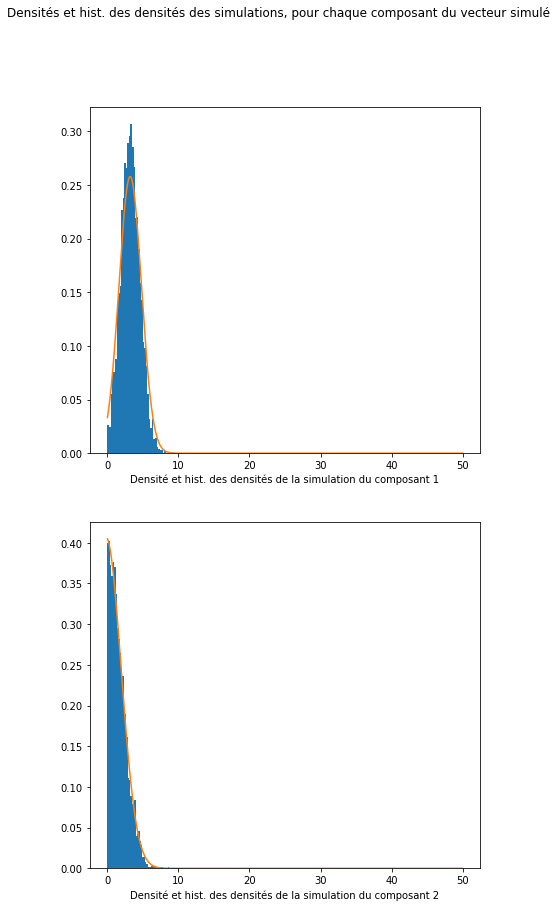

In [230]:
#on regarde les histogrammes des densités pour avoir un "a priori" sur mu' et Sigma' 
#par tâtonnement sur les paramètres, en essayant de fit une densité à chaque histogramme des densités

m_prime = np.array([[3.2,-0.2]])
S_prime = np.array([[2.5,0.1],
                    [0.1,4.5]])

plot_Gibbs(X,m_prime,S_prime)


In [181]:
#Echantillon pour l'estimateur de Monte Carlo par Important Sampling de I, 
#loi de proposition : la même que celle du modèle, avec mu' et Sigma' choisis précédemment
N = 50_000

m_prime = np.array([[3.2,-0.2]])
S_prime = np.array([[2.5,0.1],
                    [0.1,4.5]])
K_prime = np.linalg.cholesky(S_prime)

#valeur du burnin choisie après
burnin = 0 

Y0 = st.expon.rvs(size = 2)

Y = Gibbs_Sampler(N, m_prime, S_prime, Y0)

In [187]:
#vraie valeur de I(m,S) (supposée inconnue)
I = (1 - st.norm.cdf(0,loc=tuple(m)[0][0],scale=S[0,0])
     - st.norm.cdf(0,loc=tuple(m)[0][1],scale=S[1,1]) 
     + st.multivariate_normal.cdf(np.zeros(d),mean=tuple(m)[0],cov=S))
print("I = ",I)

#valeur estimée de I(m,S) (sans burnin) (aussi supposée inconnue car dépend de mu et Sigma)
burnin = 0
Z_prime = 1/(1 - st.norm.cdf(0,loc=tuple(m_prime)[0][0],scale=S_prime[0,0])
             - st.norm.cdf(0,loc=tuple(m_prime)[0][1],scale=S_prime[1,1])
             + st.multivariate_normal.cdf(np.zeros(d),mean=tuple(m_prime)[0],cov=S_prime))
I_MC = 1/(Z_prime*(N-burnin))*sum(st.multivariate_normal.pdf(Y[burnin:,:],mean=tuple(m)[0],cov=S)/st.multivariate_normal.pdf(Y[burnin:,:],mean=tuple(m_prime)[0],cov=S_prime))
print("Î = ",I_MC)


I =  0.44343405198007374
Î =  0.42906004997388114


In [188]:
#choix de la valeur de burnin

I_MC_liste = []
for N_iter in np.linspace(1_000, N, 50):
    I_MC = 1/(Z_prime*(N_iter))*sum(st.multivariate_normal.pdf(Y[:int(N_iter),:],mean=tuple(m)[0],cov=S)/st.multivariate_normal.pdf(Y[:int(N_iter),:],mean=tuple(m_prime)[0],cov=S_prime))
    I_MC_liste.append(I_MC)


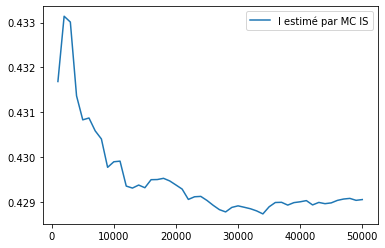

In [184]:
plt.plot(np.linspace(1_000, N, 50),I_MC_liste,label = "I estimé par MC IS")
#plt.ylim((,))
plt.legend()
plt.show()


In [189]:
#graphiquement on remarque une "stabilité" vers :
burnin = 15_000


In [191]:
#vraie valeur de I (supposée inconnue)
print("I = ",I)

#valeur estimée de I (avec burnin) (supposée inconnue)
I_MC = 1/(Z_prime*(N-burnin))*sum(st.multivariate_normal.pdf(Y[burnin:,:],mean=tuple(m)[0],cov=S)/st.multivariate_normal.pdf(Y[burnin:,:],mean=tuple(m_prime)[0],cov=S_prime))
print("Î = ",I_MC)

#peu de différence avec le cas sans burnin
#on s'intéressera dans la suite à la proximité de Î avec I

I =  0.44343405198007374
Î =  0.4289471738836722


In [192]:
#vectoriser m et K
def vectoriser_param(m,K):
    d = m.shape[1]
    K_param = []
    for j in range(d):
        for i in range(j+1):
            K_param.append(K[i,j])
    param = np.concatenate((m,np.array([K_param])),axis=1)
    return np.r_[tuple(param)]
    
#devectoriser les paramètres
def devectoriser_param(param,d):
    m = param[:d]
    
    K_matrix = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            if i >= j:
                K_matrix[i,j] = param[d:][i+j]
                
    return np.array([m]), K
    

In [194]:
#log-vraisemblance du modèle statistique, à une constante additive près, avec approximation de I par Important Sampling
def log_vraisemblance_neg_MC(param,X,m_prime,S_prime,Y):
    #param : vecteur de paramètres m et S (1ers éléments = m, autres éléments = K, matrice de la décomposition de Cholesky de S)
    #X : echantillon généré par le modèle, de taille (n,d) (individus en ligne)
    #m_prime : paramètre moyenne (array ligne) de la loi de proposition pour approximer I par IS 
    #S_prime : paramètre matrice de variance-covariance de la loi de proposition pour approximer I par IS 
    #Y : echantillon généré par la même loi du modèle avec les paramères m_prime et S_prime, pour approximer I par IS

    dim = X.shape[1]
    
    m, K = devectoriser_param(param,dim)
    S = K @ K.T
    
    n = X.shape[0]
    
    Q = np.linalg.inv(S)
    
    
    return  n * np.log(sum(st.multivariate_normal.pdf(Y,mean=tuple(m)[0],cov=S)/st.multivariate_normal.pdf(Y,mean=tuple(m_prime)[0],cov=S_prime))) + (n/2) * np.log(np.linalg.det(S)) + (1/2) * sum([np.dot(np.dot(X[i,:]-m,Q),(X[i,:]-m).T) for i in range(n)])[0,0]



Minimisation de la log-vraisemblance négative à une constante additive près, avec $x, y, \mu', \Sigma'$ fixés, via une méthode d'optimisation de type quasi-Newton :

In [195]:
#paramètres initiaux 
m_0 = np.array([[2,-1]])
S_0 = np.eye(2,2) + np.diag((1,1))
K_0 = np.linalg.cholesky(S_0)

param_0 = vectoriser_param(m_0,K_0)


In [196]:
#paramètres initiaux 
#(on peut prendre aussi m_0 = m_prime et S_0 = S_prime, c'est un peu moins long si mu' et Sigma' judicieux)
m_0 = m_prime
S_0 = S_prime
K_0 = np.linalg.cholesky(S_prime)

param_0 = vectoriser_param(m_0,K_0)


In [197]:
from scipy.optimize import minimize

#algorithme de descente de gradient de type quasi-Newton (estimation BFGS de la hessienne)

start = time.time()
res = minimize(log_vraisemblance_neg_MC, param_0, args=(X,m_prime,S_prime,Y[burnin:,:]), method='BFGS')
end = time.time()

print("durée = ", end-start, " sec")

durée =  9.794665813446045  sec


In [198]:
m_opti, K_opti = devectoriser_param(res.x,d)

S_opti = K_opti @ K_opti.T

print(m_opti)
print(S_opti)


[[ 2.97011416 -0.03321273]]
[[2.  0.3]
 [0.3 4. ]]


Les estimateurs MC-MLE valent quasiment la vraie valeur des paramètres (au centième près).

On s'intéresse à l'approximation de l'intégrale $I$ par $\hat{I}$, l'estimateur de Monte-Carlo par Important Sampling.

In [199]:
#mêmes n, N, m, S, m_prime, S_prime, burnin = 15_000 que précédemment

#vraie valeur de I(m,S)
print("I = ",I)

I_liste = [I for i in range(30)]

#valeur approximée de I(m,S) pour une taille croissante de l'échantillon de MC, avec burnin
I_MC_liste = []
for N_iter in np.linspace(20_000, N, 30):
    I_MC = 1/(Z_prime*(N_iter-burnin))*sum(st.multivariate_normal.pdf(Y[burnin:int(N_iter),:],mean=tuple(m)[0],cov=S)/st.multivariate_normal.pdf(Y[burnin:int(N_iter),:],mean=tuple(m_prime)[0],cov=S_prime))
    I_MC_liste.append(I_MC)

print(I_MC_liste[29])


I =  0.44343405198007374
0.4289471738836722


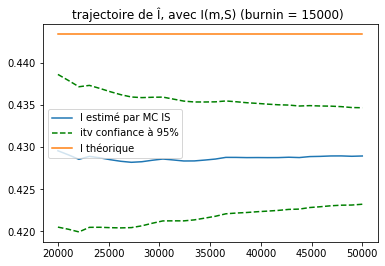

In [200]:

plt.plot(np.linspace(20_000, N, 30),I_MC_liste,label = "I estimé par MC IS")
plt.plot(np.linspace(20_000, N, 30),I_MC_liste - 1.96*np.sqrt(I_MC_liste/np.linspace(20_000, N, 30)),"g--", label="itv confiance à 95%")
plt.plot(np.linspace(20_000, N, 30),I_MC_liste + 1.96*np.sqrt(I_MC_liste/np.linspace(20_000, N, 30)),"g--")
plt.plot(np.linspace(20_000, N, 30), I_liste,label = "I théorique")
plt.title("trajectoire de Î, avec I(m,S) (burnin = {0}) ".format(burnin))
plt.legend()
plt.show()


Il y a un biais asymptotique de $Î$ qui est provoqué par le fait que $\mu'$ et $\Sigma'$ soient éloignés des vrais paramètres. On remarque que $I$ n'est pas contenu dans l'intervalle de confiance à 95% formé par $\hat{I}$ : l'estimateur $\hat{I}$ n'est donc pas fiable pour estimer $I$ en tant que tel, dans l'idéal il faut choisir $\mu'$ et $\Sigma'$ beaucoup plus proches des vrais paramètres. L'intérêt de cette approche est d'approximer l'intégrale, et non pas de retrouver la même valeur théorique de l'intégrale.

On peut donc être satisfait de l'estimateur par MC-MLE, puisqu'il correspond au dixième près aux vraies valeurs qui ont générées les données :


In [201]:
print(m_opti)
print(m)
print("-------------------------")
print(S_opti)
print(S)


[[ 2.97011416 -0.03321273]]
[[3 0]]
-------------------------
[[2.  0.3]
 [0.3 4. ]]
[[2.  0.3]
 [0.3 4. ]]


Si on prend $\mu'$ et $\Sigma'$ plus éloignés des vrais pararmètres, sans aucun a priori judicieux, l'approximation de l'intégrale $I$ est mauvaise :

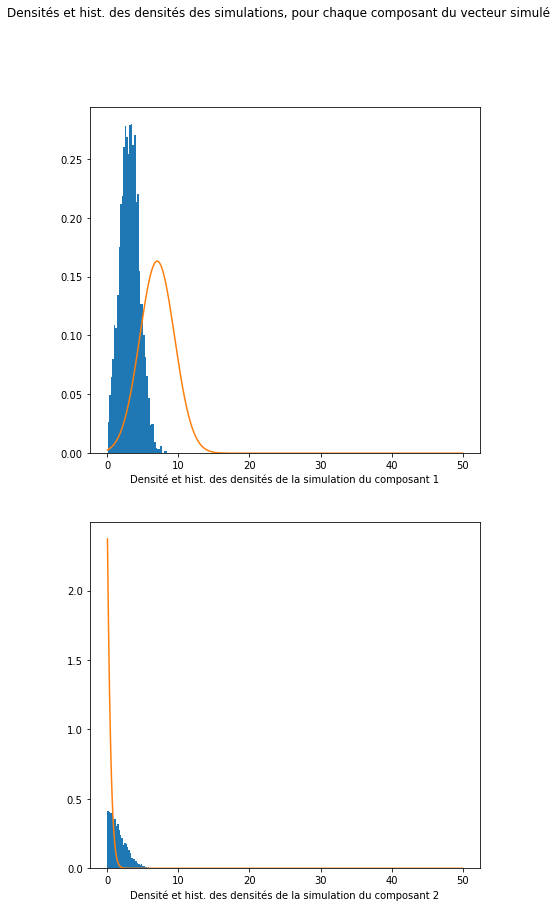

In [202]:
#Echantillon pour l'estimateur de Monte Carlo par Important Sampling de I

m_prime = np.array([[7,-2]])
S_prime = np.array([[6,-0.2],[-0.2,1]])
K_prime = np.linalg.cholesky(S_prime)

Y = Gibbs_Sampler(N, m_prime, S_prime, Y0)

plot_Gibbs(X,m_prime,S_prime)
#m_prime et S_prime pas du tout adaptés aux profils des densités de l'échantillon X


In [203]:
#valeur de I(m,S)
print("I = ",I)

#valeur estimée de I(m,S) (avec le même burnin)
Z_prime = 1/(1 - st.norm.cdf(0,loc=tuple(m_prime)[0][0],scale=S_prime[0,0])
             - st.norm.cdf(0,loc=tuple(m_prime)[0][1],scale=S_prime[1,1])
             + st.multivariate_normal.cdf(np.zeros(d),mean=tuple(m_prime)[0],cov=S_prime))
I_MC = 1/(Z_prime*(N-burnin))*sum(st.multivariate_normal.pdf(Y[burnin:,:],mean=tuple(m)[0],cov=S)/st.multivariate_normal.pdf(Y[burnin:,:],mean=tuple(m_prime)[0],cov=S_prime))
print("Î = ",I_MC)


I =  0.44343405198007374
Î =  -1.8857034742317076


Et il en découle une mauvaise estimation par MC-MLE (surtout pour le paramètre moyenne) :

In [204]:
#paramètres initiaux 
m_0 = np.array([[2,-1]])
S_0 = np.eye(2,2) + np.diag((1,1))
K_0 = np.linalg.cholesky(S_0)

param_0 = vectoriser_param(m_0,K_0)

In [205]:
#algorithme de descente de gradient de type quasi-Newton (estimation BFGS de la hessienne)
start = time.time()
res2 = minimize(log_vraisemblance_neg_MC, param_0, args=(X,m_prime,S_prime,Y), method='BFGS')
end = time.time()

print("durée = ", end-start)

durée =  12.137325763702393


In [206]:
m_opti2, K_opti2 = devectoriser_param(res2.x,d)

S_opti2 = K_opti2 @ K_opti2.T

print(m_opti2)
print(m)
print("-------------------------")
print(S_opti2)
print(S)

[[2.84405253 2.1397616 ]]
[[3 0]]
-------------------------
[[2.  0.3]
 [0.3 4. ]]
[[2.  0.3]
 [0.3 4. ]]


$\Sigma^{MC-MLE}$ reste proche de la vraie valeur des paramètres $\Sigma$, mais $\mu^{MC-MLE}$ est éloigné de $\mu$.

In [236]:
#autre méthode pour choisir mu' et Sigma' ? (retourner en d=1)
#pour plusieur mu' et Sigma', calcul de la vraisemblance après optimisation (grille de valeurs)
#on retient mu' et sigma' (et donc mu et sigma) tel que la log vraisemblance nég soit min

#étude variabilité de l'estim de MC quand mu et Sigma change (retourner en d=1)


#valeurs des paramètres
n = 5_000
d = 1
m = 6
s = 4

X0 = st.expon.rvs(size = 1)

X = Inv(n,m,s) # echantillon de taille n, paramètres supposés inconnus
#on regarde les histogrammes des densités pour avoir un "a priori" sur mu' et Sigma' 
#par tâtonnement sur les paramètres, en essayant de fit une densité à chaque histogramme des densités

m_prime = 6
s_prime = 4

fig, ax = plt.subplots()

ax.hist(X, density=True, bins="auto",label = "hist. des densités de l'échantillon") 
ax.plot(np.linspace(0,max(x),500), st.norm.pdf(np.linspace(0,max(x),500),loc=m,scale=s)/(1-st.norm.cdf(0,loc=m,scale=s)), label = "densité approchée par tâtonnement")
ax.legend()